# Import necessary libraries

In [ ]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [ ]:
# read dataset from a Google Drive File

file_link = 'https://drive.google.com/file/d/18XyvoYV69AghBKEofLm27si2E_yY6dVW/view?usp=sharing' # the file access must have to be Public

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
0,0000-0001-5000-0138,NaN,CO,2014.0,CO,False,NaN,False
1,0000-0001-5000-0736,2006.0,NaN,NaN,NaN,True,PT,False
2,0000-0001-5000-1018,2015.0,US,2005.0,US,True,US,False
3,0000-0001-5000-1181,NaN,RU,1978.0,RU,False,NaN,False
4,0000-0001-5000-1923,2016.0,GB,2004.0,GB,True,GB,False


In [ ]:
df.shape

(741867, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741867 entries, 0 to 741866
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   orcid_id          741867 non-null  object 
 1   phd_year          287295 non-null  float64
 2   country_2016      500348 non-null  object 
 3   earliest_year     603531 non-null  float64
 4   earliest_country  603495 non-null  object 
 5   has_phd           741867 non-null  bool   
 6   phd_country       315717 non-null  object 
 7   has_migrated      741867 non-null  bool   
dtypes: bool(2), float64(2), object(4)
memory usage: 35.4+ MB


In [ ]:
df.describe(include='all')

,orcid_id,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
count,741867,287295.000000,500348,603531.000000,603495,741867,315717,741867
unique,741867,NaN,223,NaN,223,2,185,2
top,0000-0001-5000-0138,NaN,US,NaN,US,False,US,False
freq,1,NaN,88930,NaN,96706,412576,71031,630718
mean,NaN,2007.581897,NaN,2000.222298,NaN,NaN,NaN,NaN
std,NaN,10.211547,NaN,11.875419,NaN,NaN,NaN,NaN
min,NaN,1913.000000,NaN,1913.000000,NaN,NaN,NaN,NaN
25%,NaN,2003.000000,NaN,1994.000000,NaN,NaN,NaN,NaN
50%,NaN,2011.000000,NaN,2003.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,NaN,2009.000000,NaN,NaN,NaN,NaN


In [ ]:
df.nunique()

orcid_id            741867
phd_year                71
country_2016           223
earliest_year           97
earliest_country       223
has_phd                  2
phd_country            185
has_migrated             2
dtype: int64

In [ ]:
df.isnull().sum()

orcid_id                 0
phd_year            454572
country_2016        241519
earliest_year       138336
earliest_country    138372
has_phd                  0
phd_country         426150
has_migrated             0
dtype: int64

In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['orcid_id', 'country_2016', 'earliest_country', 'phd_country']
Numerical Variables:
['phd_year', 'earliest_year']


has_migrated
False    630718
True     111149
Name: count, dtype: int64


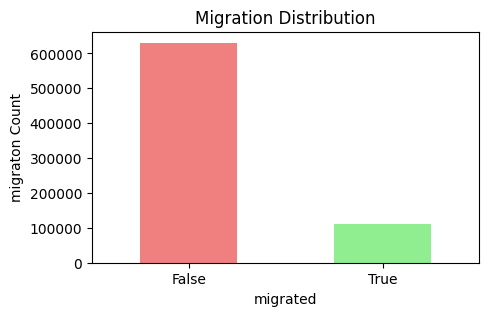

In [ ]:
print(df.value_counts('has_migrated'))

plt.figure(figsize=(5, 3))
df['has_migrated'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Migration Distribution')
plt.xlabel('migrated')
plt.ylabel('migraton Count')
plt.xticks(rotation = 0)
plt.show()

has_phd
False    412576
True     329291
Name: count, dtype: int64


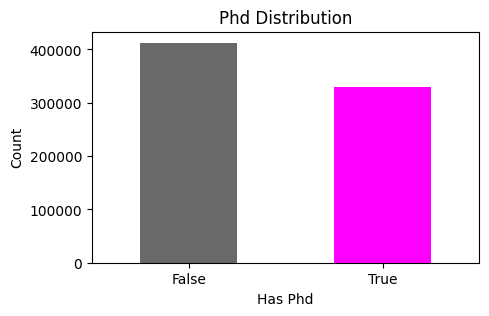

In [ ]:
# Visualize the distribution of 'has_phd' variable
print(df.value_counts('has_phd'))

plt.figure(figsize=(5, 3))
df['has_phd'].value_counts().plot(kind='bar', color=['dimgray', 'magenta'])
plt.title('Phd Distribution')
plt.xlabel('Has Phd')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

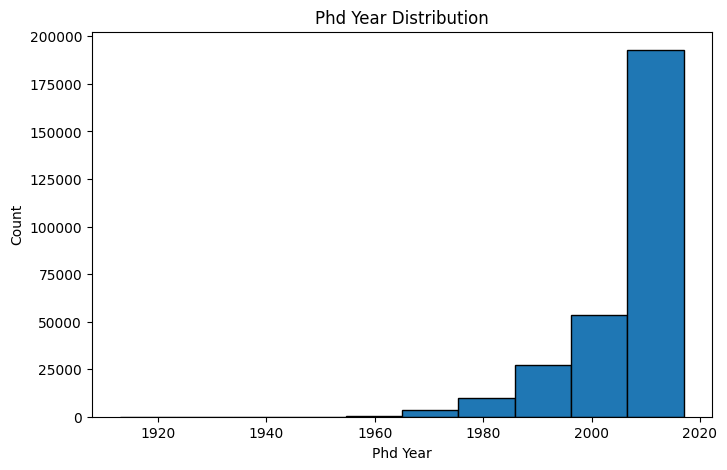

In [ ]:
# Visualize the distribution of 'phd_year' variable
plt.figure(figsize=(8, 5))
plt.hist(df['phd_year'].dropna(), edgecolor='black') # dropna eliminates the null/missing values
plt.title('Phd Year Distribution')
plt.xlabel('Phd Year')
plt.ylabel('Count')
plt.show()

# Data Preporcessing

In [ ]:
# Drop redundant features
df = df.drop(['orcid_id'], axis=1)
df

,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
0,NaN,CO,2014.0,CO,False,NaN,False
1,2006.0,NaN,NaN,NaN,True,PT,False
2,2015.0,US,2005.0,US,True,US,False
3,NaN,RU,1978.0,RU,False,NaN,False
4,2016.0,GB,2004.0,GB,True,GB,False
...,...,...,...,...,...,...,...
741862,NaN,CN,2012.0,CN,False,NaN,False
741863,NaN,PT,2012.0,PT,True,IN,True
741864,1997.0,SE,1998.0,US,True,SE,False
741865,NaN,BR,2012.0,BR,False,NaN,False


In [ ]:
# Drop duplicates
df = df.drop_duplicates()
df

,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
0,NaN,CO,2014.0,CO,False,NaN,False
1,2006.0,NaN,NaN,NaN,True,PT,False
2,2015.0,US,2005.0,US,True,US,False
3,NaN,RU,1978.0,RU,False,NaN,False
4,2016.0,GB,2004.0,GB,True,GB,False
...,...,...,...,...,...,...,...
741840,2011.0,TN,1998.0,TN,True,JP,True
741851,1993.0,US,1977.0,UA,True,UA,True
741858,1999.0,GB,2006.0,GB,True,GB,False
741863,NaN,PT,2012.0,PT,True,IN,True


In [ ]:
# Drop rows with missing values
df.dropna(subset=['phd_country', 'country_2016', 'phd_year', 'earliest_year', 'earliest_country'], inplace=True)
df

,phd_year,country_2016,earliest_year,earliest_country,has_phd,phd_country,has_migrated
2,2015.0,US,2005.0,US,True,US,False
4,2016.0,GB,2004.0,GB,True,GB,False
5,1998.0,GB,1989.0,GB,True,GB,True
8,2016.0,CA,1998.0,CA,True,CA,False
15,2008.0,KR,2003.0,US,True,US,False
...,...,...,...,...,...,...,...
741836,1998.0,CA,1983.0,HU,True,CA,True
741840,2011.0,TN,1998.0,TN,True,JP,True
741851,1993.0,US,1977.0,UA,True,UA,True
741858,1999.0,GB,2006.0,GB,True,GB,False


In [ ]:
df.shape

(88585, 7)

In [ ]:
# Check for missing values
df.isnull().sum()

phd_year            0
country_2016        0
earliest_year       0
earliest_country    0
has_phd             0
phd_country         0
has_migrated        0
dtype: int64

In [ ]:
# Convert categorical variables to numerical (one-hot encoding)
df = pd.get_dummies(df, columns=['country_2016', 'earliest_country', 'phd_country'])
df

,phd_year,earliest_year,has_phd,has_migrated,country_2016_AD,country_2016_AE,country_2016_AF,country_2016_AG,country_2016_AI,country_2016_AL,...,phd_country_UZ,phd_country_VA,phd_country_VE,phd_country_VI,phd_country_VN,phd_country_WF,phd_country_YE,phd_country_ZA,phd_country_ZM,phd_country_ZW
2,2015.0,2005.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2016.0,2004.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1998.0,1989.0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,2016.0,1998.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15,2008.0,2003.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741836,1998.0,1983.0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
741840,2011.0,1998.0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
741851,1993.0,1977.0,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
741858,1999.0,2006.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Train Test Split

In [ ]:
# Split the data into 80-20 train-test split

X = df.drop(['has_migrated'], axis=1)
y = df['has_migrated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (70868, 572)
X_test shape: (17717, 572)
y_train shape: (70868,)
y_test shape: (17717,)


# Decision Tree

Decision Tree Classifier Accuracy: 0.7186318225433199
Confusion Matrix:
[[4074 2776]
 [2209 8658]]
Classification Report
              precision    recall  f1-score   support

       False       0.65      0.59      0.62      6850
        True       0.76      0.80      0.78     10867

    accuracy                           0.72     17717
   macro avg       0.70      0.70      0.70     17717
weighted avg       0.72      0.72      0.72     17717



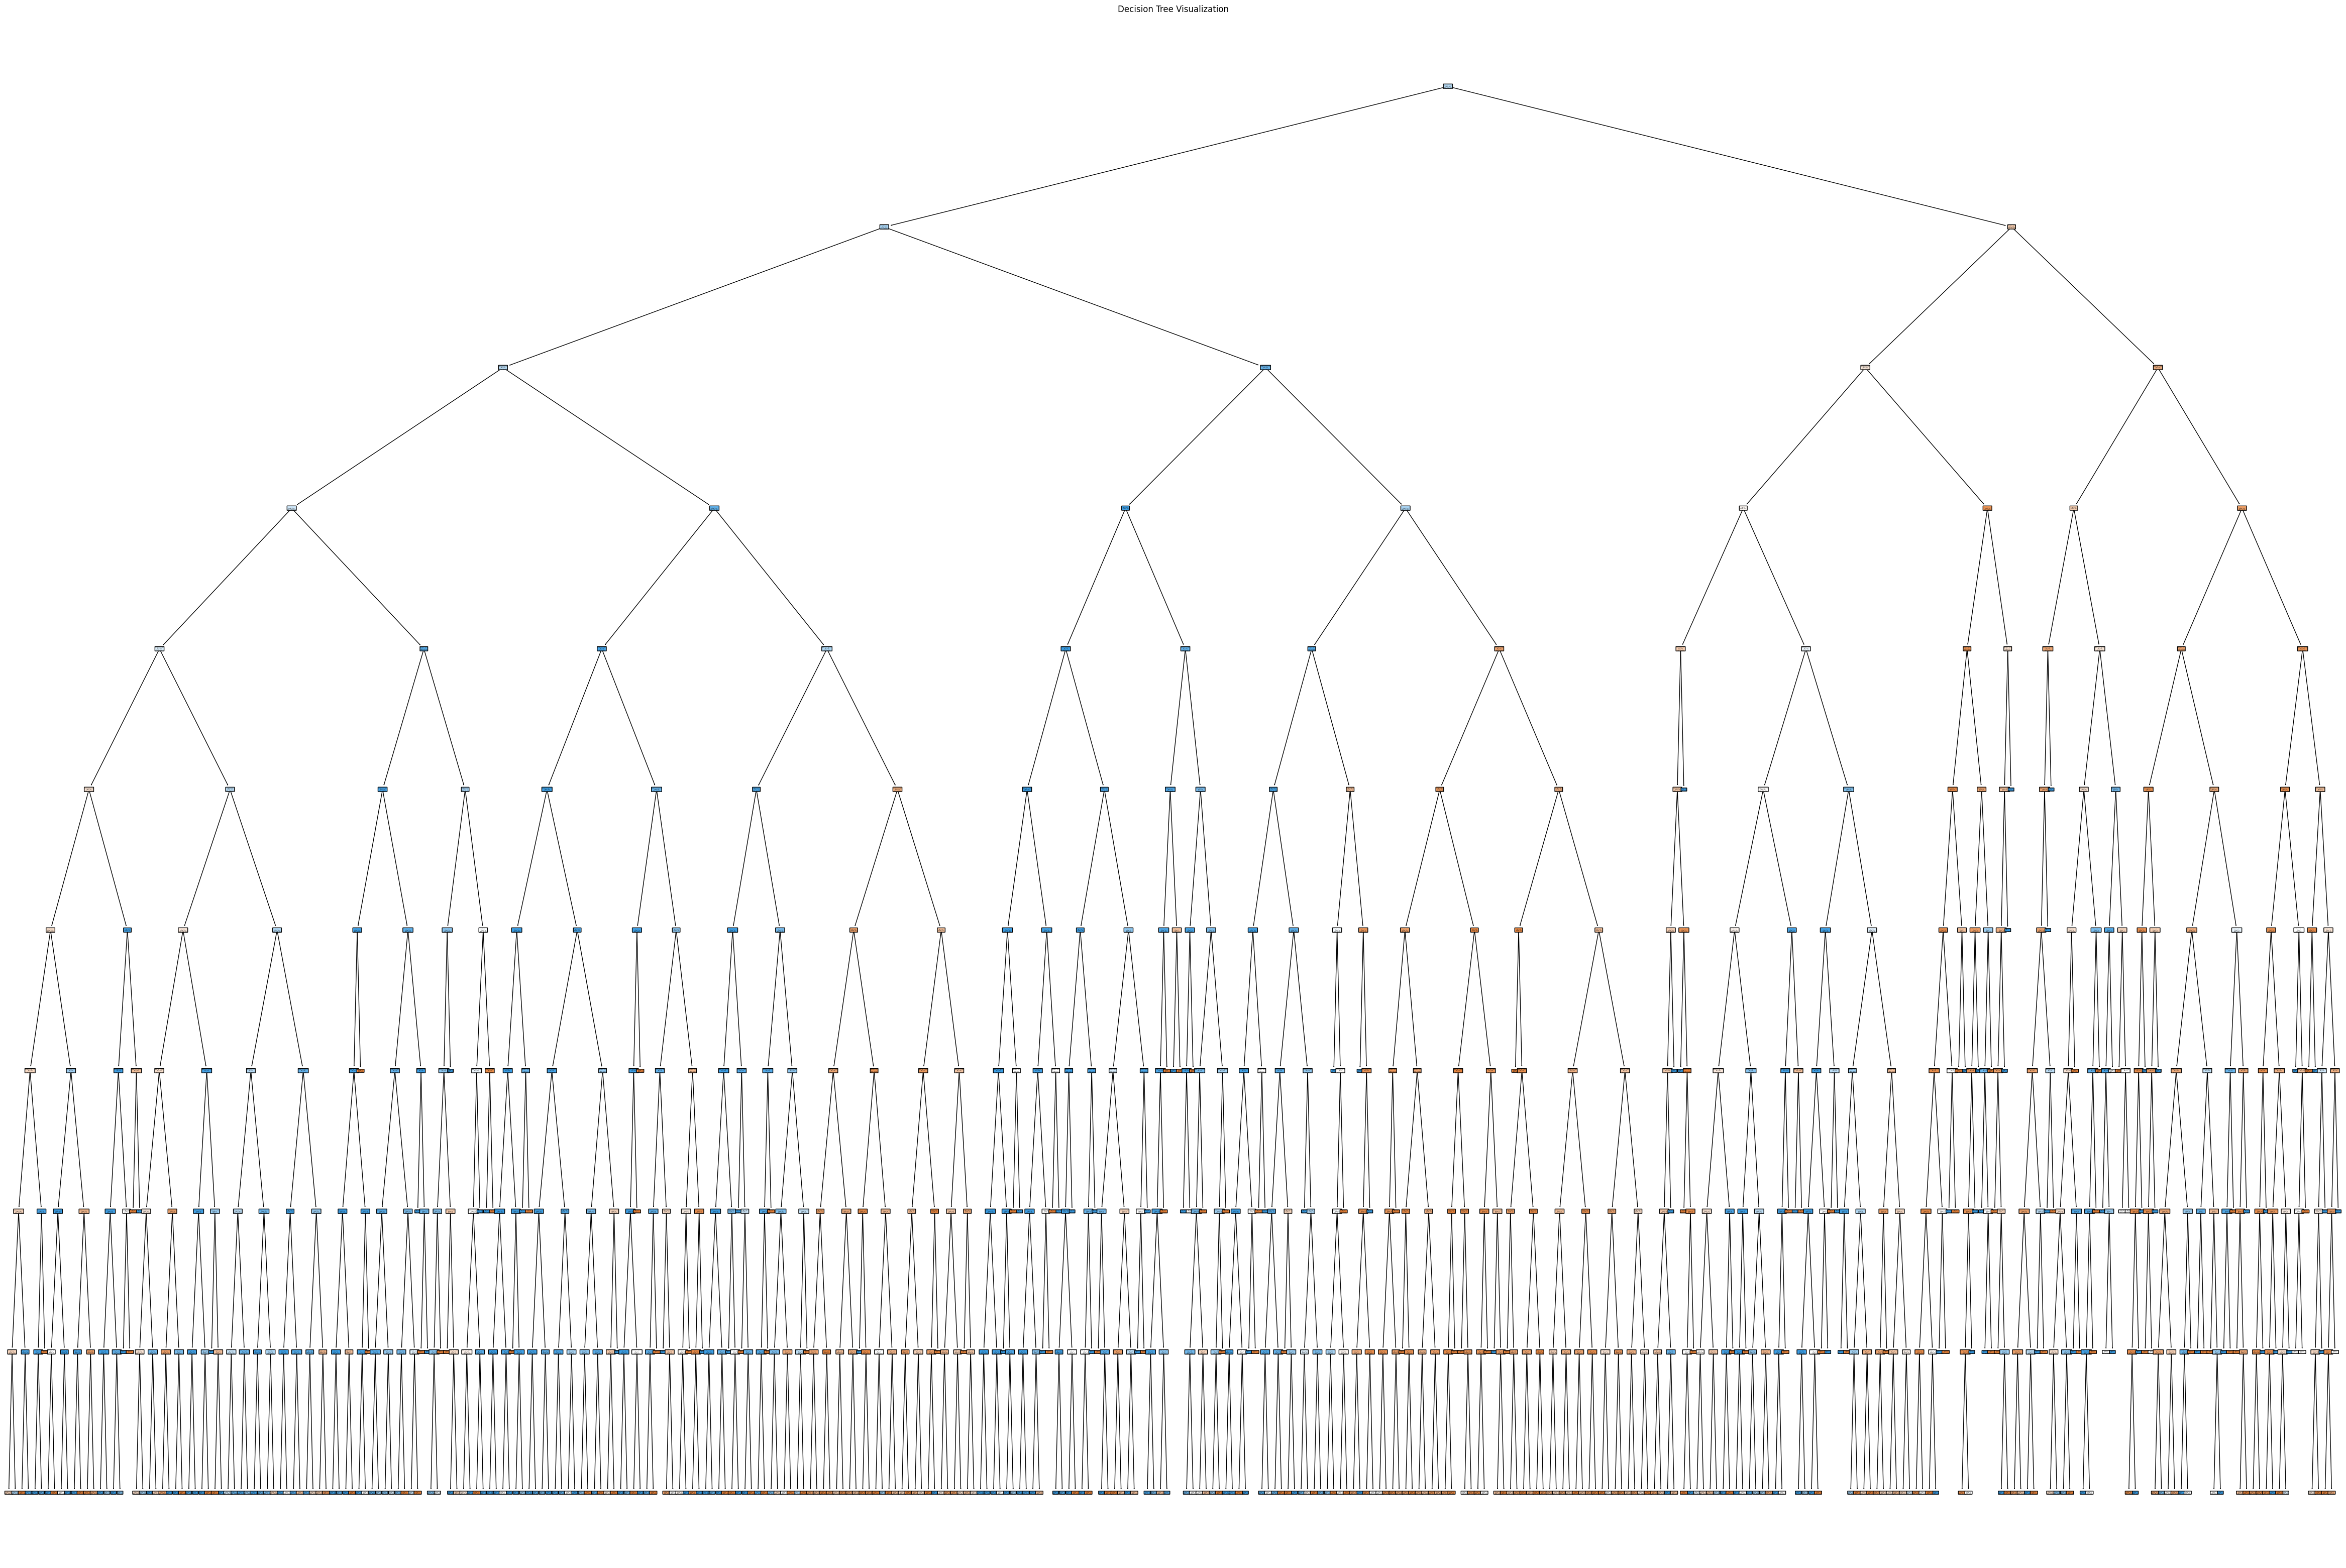

In [ ]:
# Implementing Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_decision_tree)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("Classification Report")
print(classification_report(y_test, y_pred_dt))


# Visualize the Decision Tree
plt.figure(figsize=(60, 40))
plot_tree(decision_tree_model, feature_names=X.columns, class_names=['Not Migrate', 'Migrate'], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Random Forrest

Random Forest Classifier Accuracy: 0.6213241519444601
Confusion Matrix:
[[  153  6697]
 [   12 10855]]
Classification Report
              precision    recall  f1-score   support

       False       0.93      0.02      0.04      6850
        True       0.62      1.00      0.76     10867

    accuracy                           0.62     17717
   macro avg       0.77      0.51      0.40     17717
weighted avg       0.74      0.62      0.49     17717



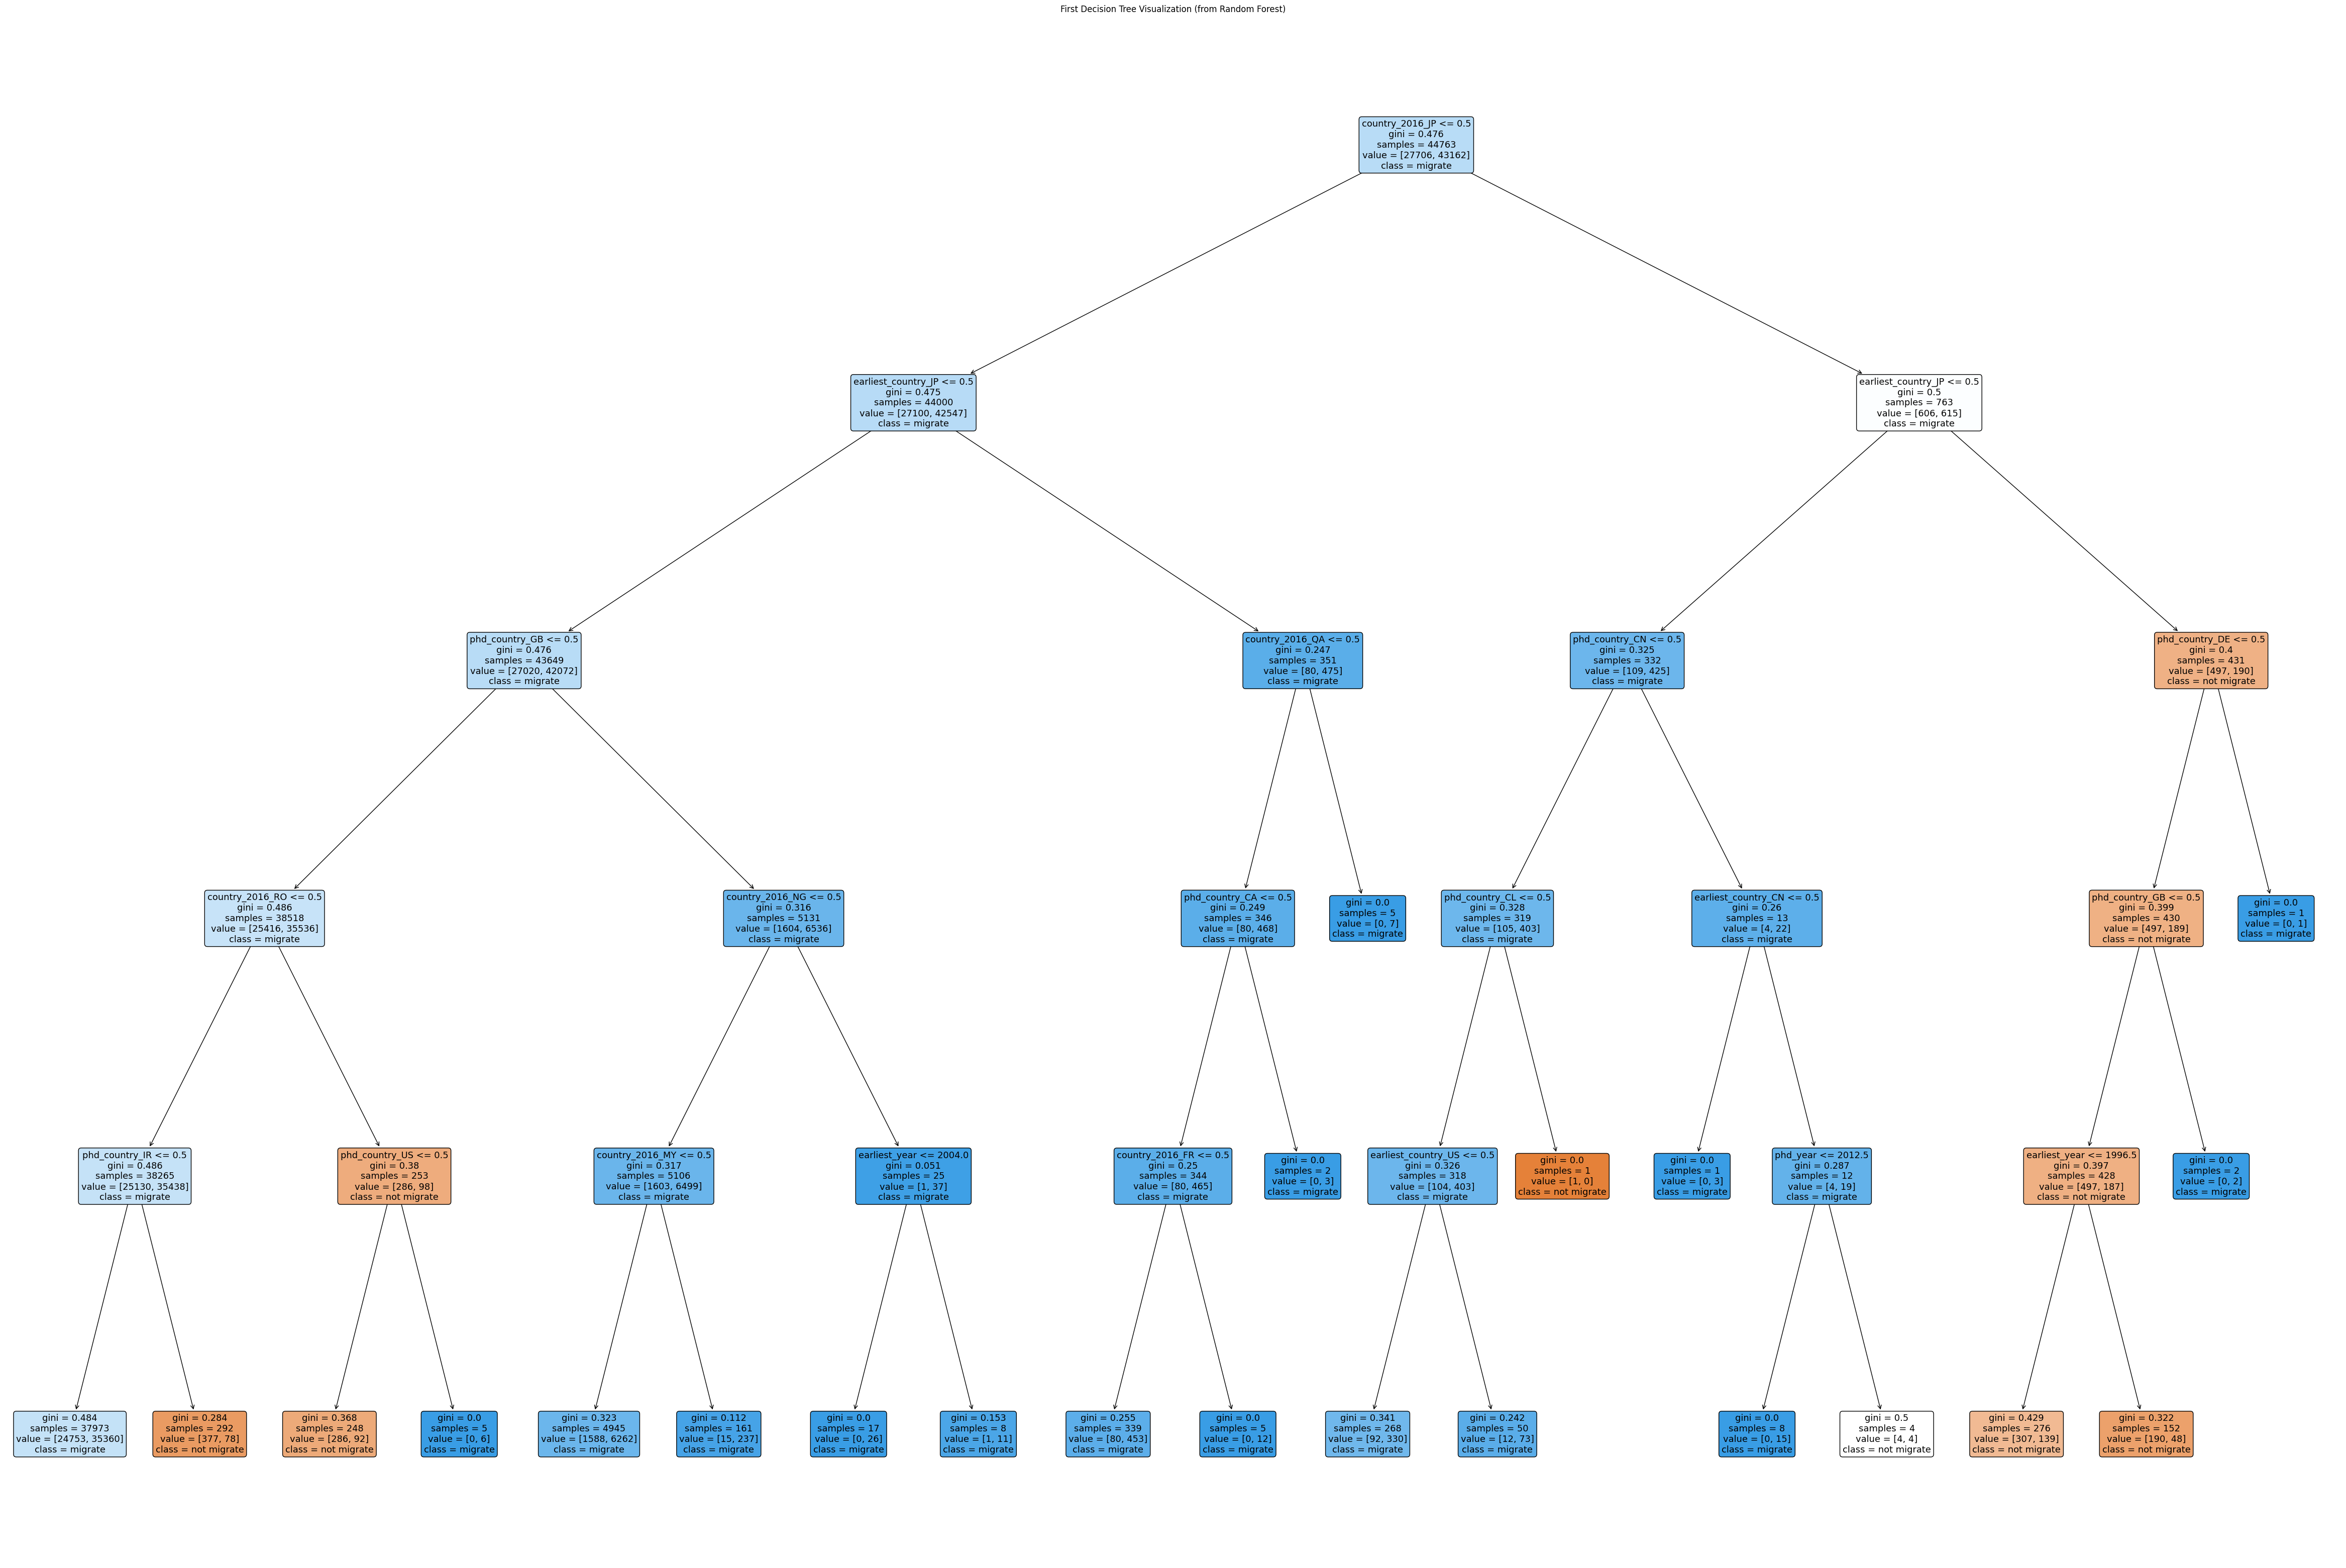

In [ ]:
# Implementing Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth = 5, criterion='gini', bootstrap=True, random_state=42)
random_forest_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the model
accuracy_random_forrest = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_random_forrest)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("Classification Report")
print(classification_report(y_test, y_pred_rf))

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(random_forest_model.estimators_[0], feature_names=X.columns, class_names=['not migrate', 'migrate'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()

# Gradient Boosted Classifier

Gradient Boosting Classifier Accuracy: 0.6875317491674663
Confusion Matrix:
[[2524 4326]
 [1210 9657]]
Classification Report
              precision    recall  f1-score   support

       False       0.68      0.37      0.48      6850
        True       0.69      0.89      0.78     10867

    accuracy                           0.69     17717
   macro avg       0.68      0.63      0.63     17717
weighted avg       0.68      0.69      0.66     17717



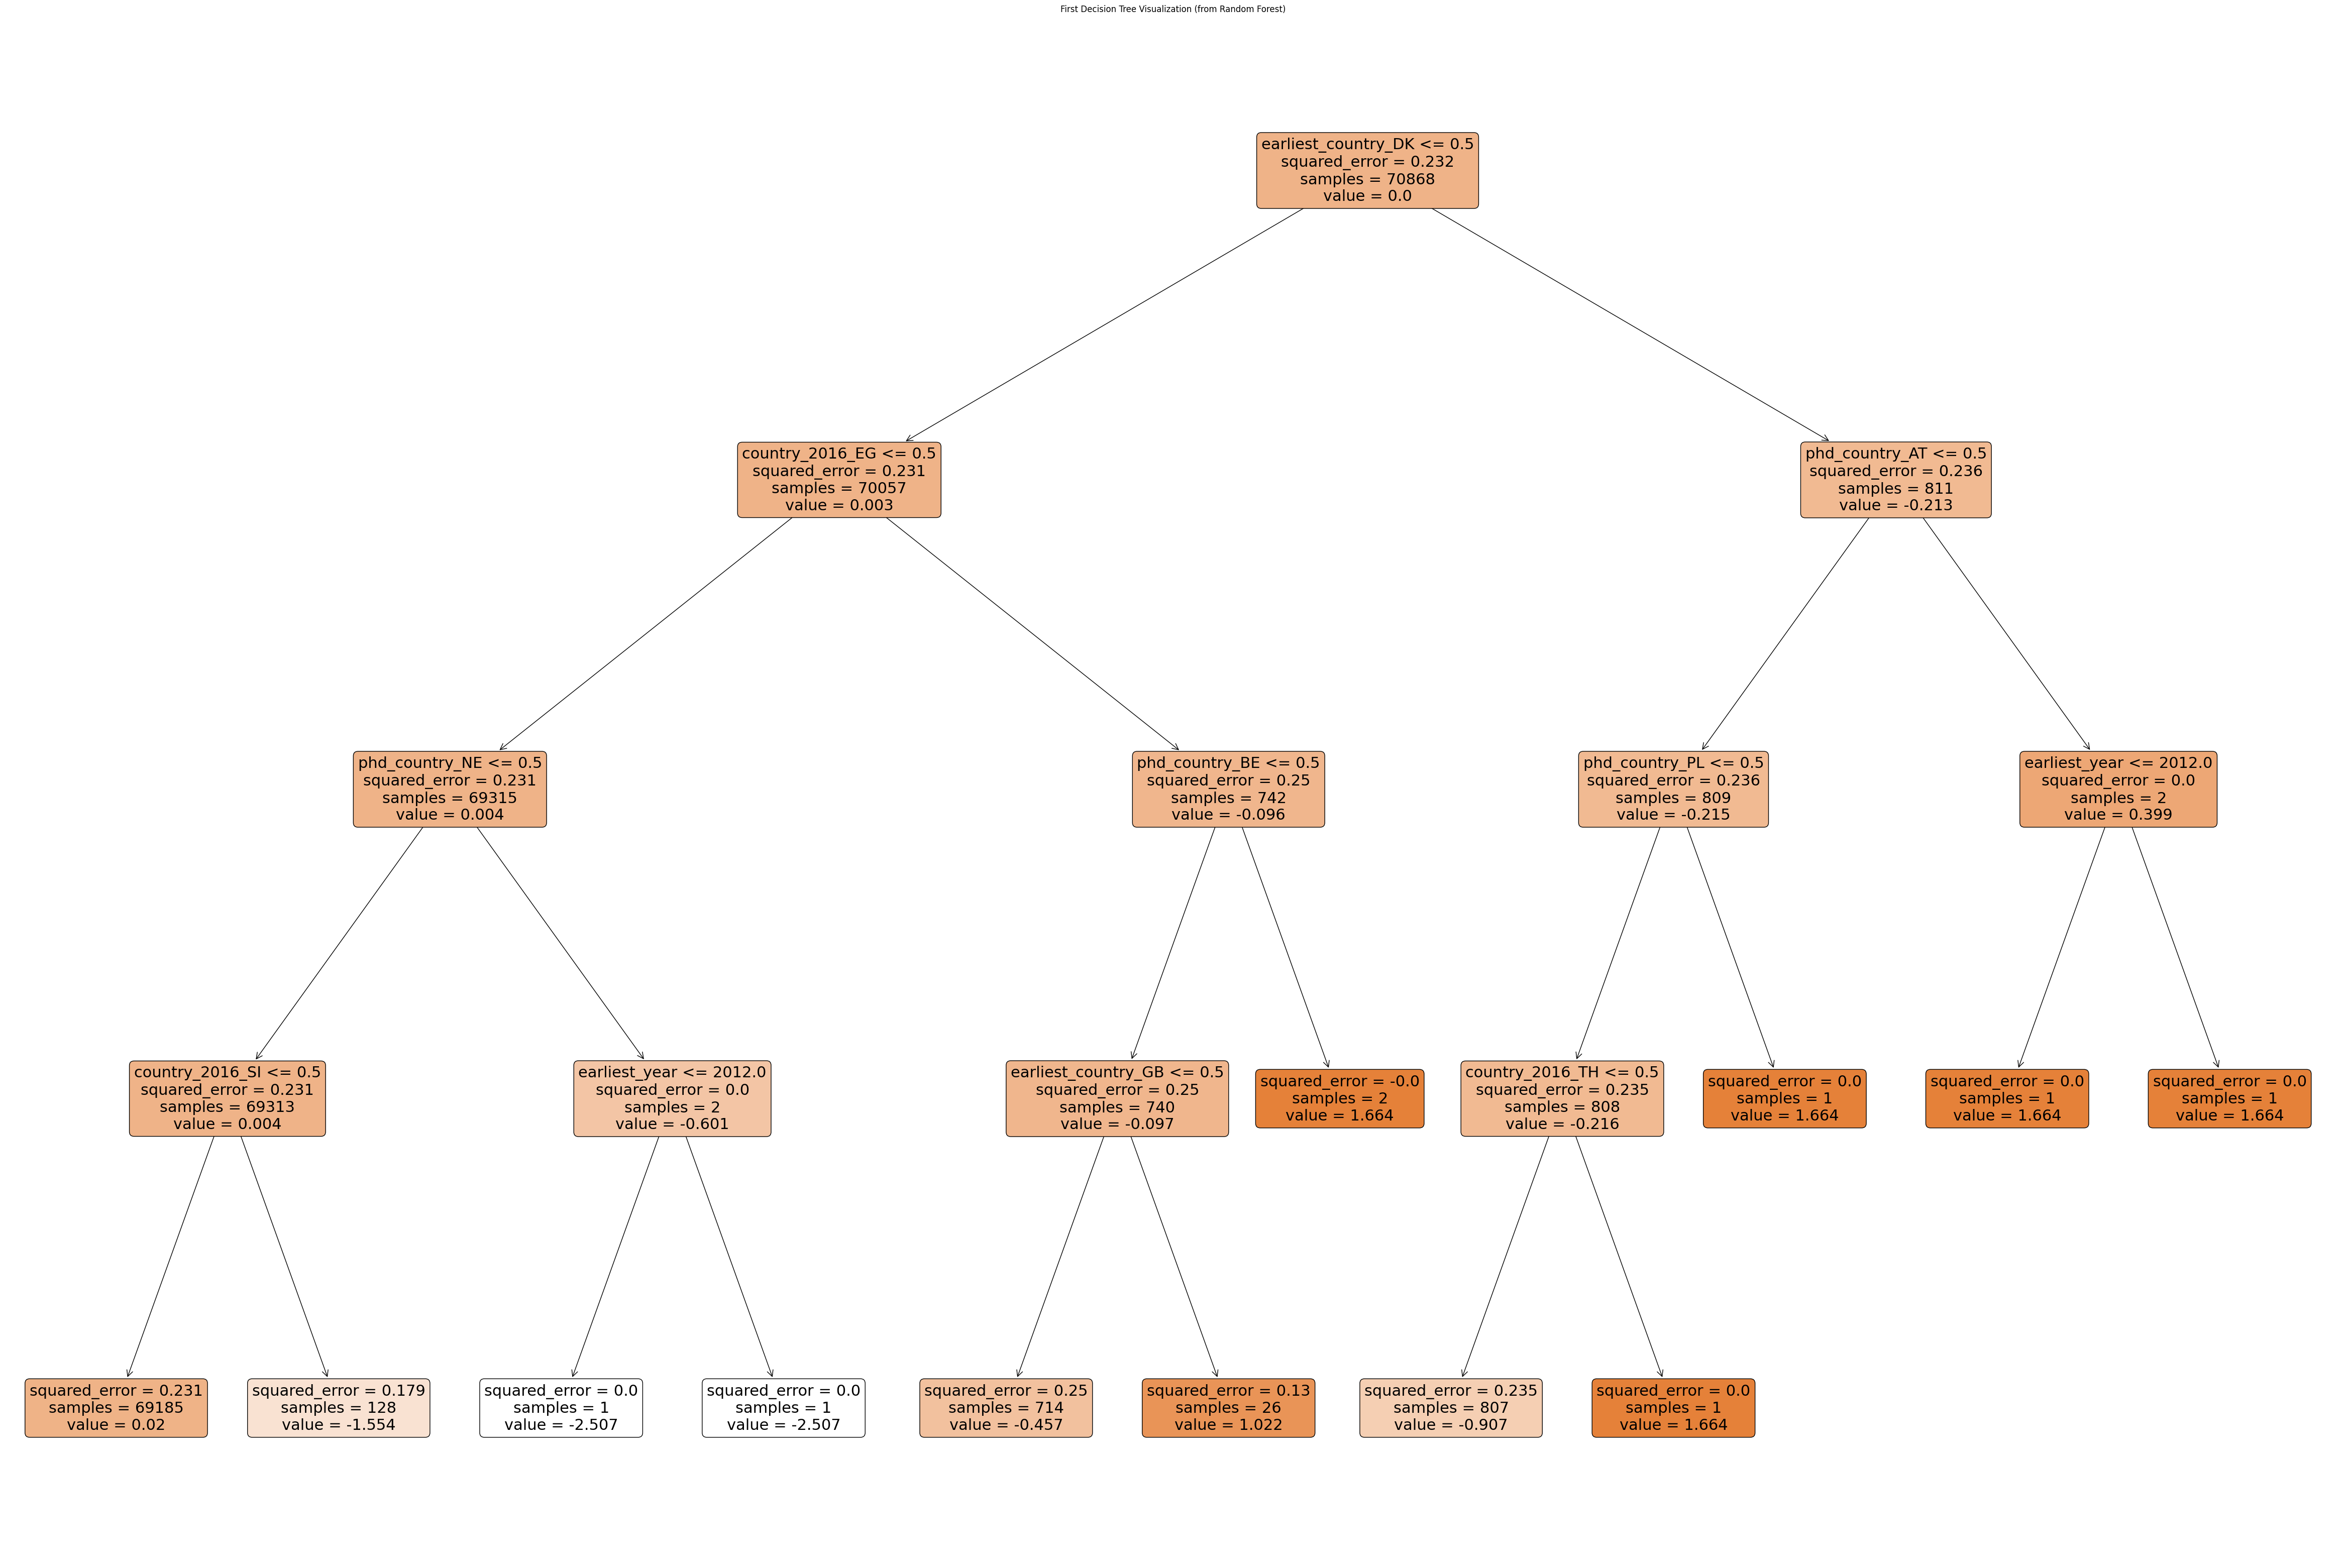

In [ ]:

Gradient_boost_model = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, criterion='squared_error', max_features=4, max_depth=4, random_state=0)
Gradient_boost_model.fit(X_train, y_train)
y_pred_gb = Gradient_boost_model.predict(X_test)
accuracy_gradient_boost = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Classifier Accuracy:", accuracy_gradient_boost)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("Classification Report")
print(classification_report(y_test, y_pred_gb))

# Visualize one of the decision trees (first tree) in the Forest
plt.figure(figsize=(60, 40))
plot_tree(Gradient_boost_model.estimators_[4,0], feature_names=X.columns, class_names=["not migrate", 'migrate'], filled=True, rounded=True)
plt.title('First Decision Tree Visualization (from Random Forest)')
plt.show()


# Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classifier Accuracy:", accuracy_logistic_regression)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("Classification Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classifier Accuracy: 0.6919343003894565
Confusion Matrix:
[[3550 3300]
 [2158 8709]]
Classification Report
              precision    recall  f1-score   support

       False       0.62      0.52      0.57      6850
        True       0.73      0.80      0.76     10867

    accuracy                           0.69     17717
   macro avg       0.67      0.66      0.66     17717
weighted avg       0.69      0.69      0.69     17717



# XGBOOST


In [ ]:
boost = xgb.XGBClassifier(random_state=2, learning_rate=0.02)
boost.fit(X_train, y_train)
y_pred_xgb = boost.predict(X_test)
accuracy_xgboost = accuracy_score(y_test, y_pred_xgb)
print("XGBOOST Classifier Accuracy:", accuracy_xgboost)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("Classification Report")
print(classification_report(y_test, y_pred_xgb))

XGBOOST Classifier Accuracy: 0.7412654512615002
Confusion Matrix:
[[3434 3416]
 [1168 9699]]
Classification Report
              precision    recall  f1-score   support

       False       0.75      0.50      0.60      6850
        True       0.74      0.89      0.81     10867

    accuracy                           0.74     17717
   macro avg       0.74      0.70      0.70     17717
weighted avg       0.74      0.74      0.73     17717



# KNN

In [ ]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNeighbors Classifier Accuracy:", accuracy_knn)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("Classification Report")
print(classification_report(y_test, y_pred_knn))

KNeighbors Classifier Accuracy: 0.7143986002144833
Confusion Matrix:
[[3605 3245]
 [1815 9052]]
Classification Report
              precision    recall  f1-score   support

       False       0.67      0.53      0.59      6850
        True       0.74      0.83      0.78     10867

    accuracy                           0.71     17717
   macro avg       0.70      0.68      0.68     17717
weighted avg       0.71      0.71      0.71     17717



# Accuracy Plot

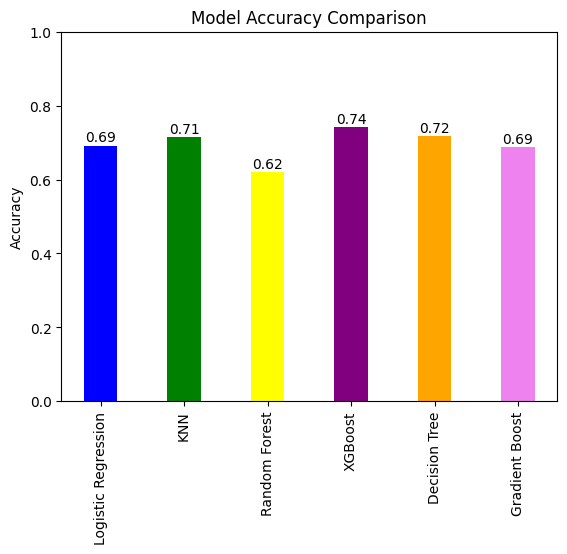

In [ ]:
accuracy_values = [accuracy_logistic_regression, accuracy_knn, accuracy_random_forrest, accuracy_xgboost, accuracy_decision_tree, accuracy_gradient_boost]

models = ['Logistic Regression', 'KNN', 'Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boost']

bar_width = 0.6
bar_positions = np.arange(len(models)) * 1.5

plt.bar(bar_positions, accuracy_values, color=['blue', 'green', 'yellow', 'purple', 'orange', 'violet', 'grey'], width=bar_width)
plt.xticks(bar_positions, models, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])

for i, value in zip(bar_positions, accuracy_values):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center')

plt.show()

